In [86]:
import pandas as pd
import numpy as np


In [87]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
test_ids=test["PassengerId"]

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
#to check the fields which have null values 
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [90]:
#defining a function to clean data
def clean(train):
  train=train.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)
  train['Age'].fillna(train['Age'].mean(), inplace=True)
  train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
  train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
  return train


In [91]:
train=clean(train)
test=clean(test)

In [92]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [93]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [94]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=train.drop("Survived",axis=1)
Y=train['Survived']

X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=2)
clf=LogisticRegression(random_state=0,max_iter=1000).fit(X_train,Y_train)
predictions=clf.predict(X_val)
from sklearn.metrics import accuracy_score
ans=round(accuracy_score(Y_val,predictions)*100,2)
print(ans)

  


78.21


In [95]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [96]:
 test['Fare'].fillna(train['Fare'].mean(), inplace=True)

In [97]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [98]:
#prediction
check=clf.predict(test)
#creating a new dataframe to test the model
testdf=pd.DataFrame({"PassengerId":test_ids.values,"Survived":check})
#converting dataframe to excel sheet 
testdf.to_csv("Final.csv",index=False)



In [99]:
#using linear support vector machine model
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
clf1=linear_svc.fit(X, Y)

Y_pred = linear_svc.predict(X_val)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

print(acc_linear_svc)

76.26


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [100]:
#Prediction 
check1=clf1.predict(test)
#creating a new dataframe to test the model
testdf1=pd.DataFrame({"PassengerId":test_ids.values,"Survived":check})
#converting dataframe to excel sheet 
testdf1.to_csv("Final_SVM.csv",index=False)


In [101]:
#using Decision Tree model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
clf2=decision_tree.fit(X, Y)  
Y_pred1 = decision_tree.predict(X_val) 
acc_decision_tree = round(decision_tree.score(X, Y) * 100, 2)
print(acc_decision_tree)

98.2


In [102]:
#Prediction 
check2=clf2.predict(test)
#creating a new dataframe to test the model
testdf2=pd.DataFrame({"PassengerId":test_ids.values,"Survived":check})
#converting dataframe to excel sheet 
testdf2.to_csv("Final_DeciTree.csv",index=False)


In [103]:
# adding all three results into a dataframe
result= pd.DataFrame({'Model': ['Support Vector Machines', 'Logistic Regression', 'Decision Tree'],
    'Score': [acc_linear_svc,ans,acc_decision_tree]})
result_df = result.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
98.20,Decision Tree
78.21,Logistic Regression
76.26,Support Vector Machines


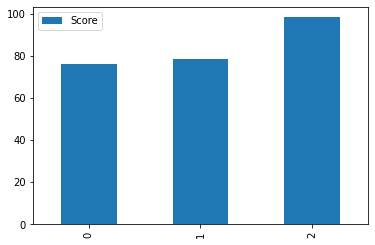

In [106]:
result.plot.bar()